![banner.png](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

# Ames Housing Data
Estates Agent are looking for the way to accurately predict saleprice of housing in Ames. By using data science to predict the prices, we will be able to come up with more competitive prices. We are also looking for features that homeowners can look into to potentially improve the property's sales value.
## Problem Statement

Create a regression model where we are able to see which features affect the price of property at sales in Iowa Ames

## Executive Summary

The data set that we will be exploring is the Ames Iowa Housing Dataset till the year 2010. In the Dataset there is a total of 81 features and 2051 columns. We will explore the data to see the correlation the features have to SalePrice, and also to build a regression model to predict the SalePrice of housing.

The final Kaggle models using Lasso, Ridge Regression uses 120 features to do the prediction with a RMSE score of around 28,000. At the end of the project, we will use the top 50 coefficient features to do our recommendations to homeowners and how they can improve their property prices using those features.

### Contents:
- [1. Importing of libraries](#1.-Importing-of-Libraries)
- [2. Importing Datasets](#2.-Importing-of-Datasets)
- [3. Manual Check of Dataset](#3.-Manual-Check-of-Dataset)
- [4. Data Cleaning](#4.-Data-Cleaning)
- [5. Exploratory Data Analysis(EDA)](#5.-Exploratory-Data-Analysis(EDA))


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

# 1. Importing of Libraries

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')

In [2]:
from IPython.display import display
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

# 2. Importing of Datasets

In [3]:
df = pd.read_csv('../datasets/train.csv') #importing train data for EDA
df.shape

(2051, 81)

# 3. Manual Check of Dataset

## 3.1 first 20 columns of data

In [4]:
#checking first 20 columns
df.iloc[:,:20].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8


In [5]:
#checking first 20 columns dtypes and null values
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2051 non-null   int64  
 1   PID           2051 non-null   int64  
 2   MS SubClass   2051 non-null   int64  
 3   MS Zoning     2051 non-null   object 
 4   Lot Frontage  1721 non-null   float64
 5   Lot Area      2051 non-null   int64  
 6   Street        2051 non-null   object 
 7   Alley         140 non-null    object 
 8   Lot Shape     2051 non-null   object 
 9   Land Contour  2051 non-null   object 
 10  Utilities     2051 non-null   object 
 11  Lot Config    2051 non-null   object 
 12  Land Slope    2051 non-null   object 
 13  Neighborhood  2051 non-null   object 
 14  Condition 1   2051 non-null   object 
 15  Condition 2   2051 non-null   object 
 16  Bldg Type     2051 non-null   object 
 17  House Style   2051 non-null   object 
 18  Overall Qual  2051 non-null 

In [6]:
#checking values of first 20 columns
df.iloc[:,:20].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2051,NaN,NaN,NaN,1474.03,843.981,1,753.5,1486,2198,2930
PID,2051,NaN,NaN,NaN,7.1359e+08,1.88692e+08,5.26301e+08,5.28458e+08,5.35453e+08,9.0718e+08,9.24152e+08
MS SubClass,2051,NaN,NaN,NaN,57.0088,42.8242,20,20,50,70,190
MS Zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Frontage,1721,NaN,NaN,NaN,69.0552,23.2607,21,58,68,80,313
Lot Area,2051,NaN,NaN,NaN,10065.2,6742.49,1300,7500,9430,11513.5,159000
Street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,140,2,Grvl,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lot Shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Land Contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.1. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- "PID" seems to be an unknown data to explained on the Data Dictionary.
- Missing datas:
  - Lot Frontage, float
  - Alley, object
- No Negative values noted

## 3.2. Second 20 columns


In [7]:
#Checking 2nd 20 columns of data
df.iloc[:, 20:40].head()

,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF
0,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0
1,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0
2,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0
3,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0
4,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0


In [8]:
#checking for data types and null objects.
df.iloc[:, 20:40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      2051 non-null   int64  
 1   Year Remod/Add  2051 non-null   int64  
 2   Roof Style      2051 non-null   object 
 3   Roof Matl       2051 non-null   object 
 4   Exterior 1st    2051 non-null   object 
 5   Exterior 2nd    2051 non-null   object 
 6   Mas Vnr Type    2029 non-null   object 
 7   Mas Vnr Area    2029 non-null   float64
 8   Exter Qual      2051 non-null   object 
 9   Exter Cond      2051 non-null   object 
 10  Foundation      2051 non-null   object 
 11  Bsmt Qual       1996 non-null   object 
 12  Bsmt Cond       1996 non-null   object 
 13  Bsmt Exposure   1993 non-null   object 
 14  BsmtFin Type 1  1996 non-null   object 
 15  BsmtFin SF 1    2050 non-null   float64
 16  BsmtFin Type 2  1995 non-null   object 
 17  BsmtFin SF 2    2050 non-null   f

In [9]:
df.iloc[:, 20:40].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year Built,2051,NaN,NaN,NaN,1971.71,30.1779,1872,1953.5,1974,2001,2010
Year Remod/Add,2051,NaN,NaN,NaN,1984.19,21.0363,1950,1964.5,1993,2004,2010
Roof Style,2051,6,Gable,1619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roof Matl,2051,6,CompShg,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 1st,2051,15,VinylSd,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exterior 2nd,2051,15,VinylSd,721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Type,2029,4,None,1218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Area,2029,NaN,NaN,NaN,99.6959,174.963,0,0,0,161,1600
Exter Qual,2051,4,TA,1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exter Cond,2051,5,TA,1778,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- Missing datas:
  - Mas Vnr Type, object
  - Mas Vnr Area, float64
  - Bsmt Qual, object
  - Bsmt Cond,object
  - Bsmt Exposure, object
  - BsmtFin Type 1, object
  - BsmtFin SF 1, float64
  - BsmtFin Type 2, object
  - BsmtFin SF 2, float64
  - Bsmt Unf SF, float64
  - Total Bsmt SF, float64
- No Negative values noted

## 3.3. Third 20 columns

In [10]:
# checking third 20 columns
df.iloc[:, 40:60].head()

,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type
0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd
1,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd
2,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd
3,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn
4,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd


In [11]:
# checking dtypes and null values
df.iloc[:, 40:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Heating          2051 non-null   object 
 1   Heating QC       2051 non-null   object 
 2   Central Air      2051 non-null   object 
 3   Electrical       2051 non-null   object 
 4   1st Flr SF       2051 non-null   int64  
 5   2nd Flr SF       2051 non-null   int64  
 6   Low Qual Fin SF  2051 non-null   int64  
 7   Gr Liv Area      2051 non-null   int64  
 8   Bsmt Full Bath   2049 non-null   float64
 9   Bsmt Half Bath   2049 non-null   float64
 10  Full Bath        2051 non-null   int64  
 11  Half Bath        2051 non-null   int64  
 12  Bedroom AbvGr    2051 non-null   int64  
 13  Kitchen AbvGr    2051 non-null   int64  
 14  Kitchen Qual     2051 non-null   object 
 15  TotRms AbvGrd    2051 non-null   int64  
 16  Functional       2051 non-null   object 
 17  Fireplaces    

In [12]:
df.iloc[:, 40:60].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Heating,2051,5,GasA,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Heating QC,2051,5,Ex,1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Central Air,2051,2,Y,1910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrical,2051,5,SBrkr,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Flr SF,2051,NaN,NaN,NaN,1164.49,396.447,334,879.5,1093,1405,5095
2nd Flr SF,2051,NaN,NaN,NaN,329.329,425.671,0,0,0,692.5,1862
Low Qual Fin SF,2051,NaN,NaN,NaN,5.51292,51.0689,0,0,0,0,1064
Gr Liv Area,2051,NaN,NaN,NaN,1499.33,500.448,334,1129,1444,1728.5,5642
Bsmt Full Bath,2049,NaN,NaN,NaN,0.427526,0.522673,0,0,0,1,3
Bsmt Half Bath,2049,NaN,NaN,NaN,0.0634456,0.251705,0,0,0,0,2


### 3.3. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- Missing datas:
  - Bsmt Full Bath, float64
  - Bsmt Half Bath, float 64
  - Fireplace Qu, object
  - Garage Type, object
- No Negative values noted

## 3.4. last 21 columns

In [13]:
# checking last 21 columns
df.iloc[:, 60:].head()

,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
df.iloc[:, 60:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Garage Yr Blt   1937 non-null   float64
 1   Garage Finish   1937 non-null   object 
 2   Garage Cars     2050 non-null   float64
 3   Garage Area     2050 non-null   float64
 4   Garage Qual     1937 non-null   object 
 5   Garage Cond     1937 non-null   object 
 6   Paved Drive     2051 non-null   object 
 7   Wood Deck SF    2051 non-null   int64  
 8   Open Porch SF   2051 non-null   int64  
 9   Enclosed Porch  2051 non-null   int64  
 10  3Ssn Porch      2051 non-null   int64  
 11  Screen Porch    2051 non-null   int64  
 12  Pool Area       2051 non-null   int64  
 13  Pool QC         9 non-null      object 
 14  Fence           400 non-null    object 
 15  Misc Feature    65 non-null     object 
 16  Misc Val        2051 non-null   int64  
 17  Mo Sold         2051 non-null   i

In [15]:
df.iloc[:, 60:].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Garage Yr Blt,1937,NaN,NaN,NaN,1978.71,25.4411,1895,1961,1980,2002,2207
Garage Finish,1937,3,Unf,849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cars,2050,NaN,NaN,NaN,1.77659,0.764537,0,1,2,2,5
Garage Area,2050,NaN,NaN,NaN,473.672,215.935,0,319,480,576,1418
Garage Qual,1937,5,TA,1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cond,1937,5,TA,1868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Paved Drive,2051,3,Y,1861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wood Deck SF,2051,NaN,NaN,NaN,93.8337,128.549,0,0,0,168,1424
Open Porch SF,2051,NaN,NaN,NaN,47.5568,66.7472,0,0,27,70,547
Enclosed Porch,2051,NaN,NaN,NaN,22.5719,59.8451,0,0,0,0,432


### 3.4. comments:
- All dtypes of the 20 features are correct for what they suppose to represent
- Missing datas:
  - Garage Yr Blt, float64
  -  Garage Finish, object
  - Garage Cars, float64
  - Garage Area, float 64
  - Garage Qual, object
  - Garage Cond, object
  - Pool QC, object
  - Fence, object
  - Misc Feature, object
- No Negative values noted

# 4. Data Cleaning

## 4.1 Counting the missing values

In [16]:
#checking the count and list of nan values
nan_values = df.isna().sum().sort_values(ascending = False)
nan_values_list = nan_values[nan_values >= 1]
nan_values_list

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Finish      114
Garage Cond        114
Garage Qual        114
Garage Yr Blt      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
Garage Area          1
Bsmt Unf SF          1
BsmtFin SF 2         1
Total Bsmt SF        1
BsmtFin SF 1         1
dtype: int64

### 4.1. comments
Missing values above will either be removed or filled in after manual inspection with data dictionary

## 4.2. Filling Missing values

### 4.2.1 Filling Missing values in Pool QC
- Base on data dictionary, empty values suppose to be houses without pools
- Thus the information will need to be filled in

In [17]:
#importing datasets without NA filter
df_train_nona = pd.read_csv('../datasets/train.csv', na_filter = False)
df_test_nona = pd.read_csv('../datasets/test.csv', na_filter = False)
df_nona = pd.concat([df_train_nona, df_test_nona], ignore_index=False, sort=False, axis = 0)
df_nona.isna().sum().sum()

879

Missing data belongs to Test data set with no sale price data

In [18]:
#checking for unique values
df['Pool QC'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [19]:
#checking for unique values
df_nona['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [20]:
#replacing nan value with NA for Pool QC
df['Pool QC'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Pool QC'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [21]:
df['Pool QC'].isna().sum()

0

#### 4.2.1 comments: 
All missing values in 'Pool QC' has been filled

### 4.2.2 Filling missing values in Misc Feature
- base on data dictionary, missing values should be house without misc feature
- thus information will need to be filled in

In [22]:
#checking for unique values
df['Misc Feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [23]:
#checking for unique values
df_nona['Misc Feature'].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [24]:
#replacing nan value with NA for Misc Feature
df['Misc Feature'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Misc Feature'].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [25]:
df['Misc Feature'].isna().sum()

0

#### 4.2.2 comments: 
All missing values in 'Misc Feature' has been filled

### 4.2.3 Filling missing values in Alley category
- base on data dictionary, missing values should be house without alley access
- thus information will need to be filled in

In [26]:
#checking for unique values
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [27]:
#checking for unique values
df_nona['Alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [28]:
#replacing nan value with NA for Alley
df['Alley'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [29]:
df['Alley'].isna().sum()

0

#### 4.2.3 comments: 
All missing values in 'Alley' has been filled

## 4.2.4 Filling missing values in Fence category
- base on data dictionary, missing values should be house without fence
- thus information will need to be filled in

In [30]:
#checking for unique values
df['Fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [31]:
#checking for unique values
df_nona['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [32]:
#replacing nan value with NA for Alley
df['Fence'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [33]:
df['Fence'].isna().sum()

0

#### 4.2.4 comments: 
All missing values in 'Fence' has been filled

### 4.2.5 Filling missing values in Fireplace QU
- base on data dictionary, missing values should be house without fireplaces
- thus information will need to be filled in

In [34]:
#checking for unique values
df['Fireplace Qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [35]:
#checking for unique values
df_nona['Fireplace Qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [36]:
#replacing nan value with NA for Alley
df['Fireplace Qu'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Fireplace Qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [37]:
df['Fence'].isna().sum()

0

#### 4.2.5 comments: 
All missing values in 'Fireplace QU' has been filled

### 4.2.6 Filling missing values in Lot Frontage
- base on data dictionary, missing values should be Linear feet of street connected to property
- adding in 0 for missing values to keep the datatype as a float

In [38]:
#checking for null values
df['Lot Frontage'].isnull().sum()

330

In [39]:
#replacing nan value with 0 for Lot Frontage
df['Lot Frontage'].fillna(0, inplace = True)

In [40]:
#checking for null values
df['Lot Frontage'].isnull().sum()

0

#### 4.2.6 comments: 
All missing values in 'Lot Frontage' has been filled

### 4.2.7 Handling Garage related columns

In [41]:
#Filtering Garage related columns
df_garage = df.filter(regex='Garage')
df_garage.isna().sum()

Garage Type      113
Garage Yr Blt    114
Garage Finish    114
Garage Cars        1
Garage Area        1
Garage Qual      114
Garage Cond      114
dtype: int64

In [42]:
#checking dtypes
df_garage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    1938 non-null   object 
 1   Garage Yr Blt  1937 non-null   float64
 2   Garage Finish  1937 non-null   object 
 3   Garage Cars    2050 non-null   float64
 4   Garage Area    2050 non-null   float64
 5   Garage Qual    1937 non-null   object 
 6   Garage Cond    1937 non-null   object 
dtypes: float64(3), object(4)
memory usage: 112.3+ KB


In [43]:
garage_df = df[((df['Garage Area'].isnull()) & (df['Garage Cars'].isnull()))]
garage_df[df.filter(regex = 'Garage').keys()]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


- 'Garage Type', 'Garage Finish', 'Garage Qual' and 'Garage Cond'should have NA values in them.
- 'Garage Yr Blt' refers to year Garage is built, so a number need to be insert for dtype to remain float
- Garage cars and Garage area denotes the number of car and area size of garade, therefore a number need to be filled in for nan values
- Dropping the column with no data of garage despite being suggested that a garage exist for the property

In [44]:
#filling dtypes object nan values
df['Garage Type'].fillna('NA', inplace = True)
df['Garage Finish'].fillna('NA', inplace = True)
df['Garage Qual'].fillna('NA', inplace = True)
df['Garage Cond'].fillna('NA', inplace = True)

#filling dtypes float64 nan values with number 0
df['Garage Yr Blt'].fillna(0 , inplace = True)
df['Garage Cars'].fillna(0 , inplace = True)
df['Garage Area'].fillna(0 , inplace = True)

df.drop(1712, inplace = True)

In [45]:
df_garage = df.filter(regex='Garage')
df_garage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    2050 non-null   object 
 1   Garage Yr Blt  2050 non-null   float64
 2   Garage Finish  2050 non-null   object 
 3   Garage Cars    2050 non-null   float64
 4   Garage Area    2050 non-null   float64
 5   Garage Qual    2050 non-null   object 
 6   Garage Cond    2050 non-null   object 
dtypes: float64(3), object(4)
memory usage: 128.1+ KB


#### 4.2.7. Comments

All missing values in Garage category has been filled

### 4.2.8 Handling Basement related columns

In [46]:
df_bsmt = df.filter(regex='Bsmt')
df_bsmt.isnull().sum()

Bsmt Qual         55
Bsmt Cond         55
Bsmt Exposure     58
BsmtFin Type 1    55
BsmtFin SF 1       1
BsmtFin Type 2    56
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [47]:
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       1995 non-null   object 
 1   Bsmt Cond       1995 non-null   object 
 2   Bsmt Exposure   1992 non-null   object 
 3   BsmtFin Type 1  1995 non-null   object 
 4   BsmtFin SF 1    2049 non-null   float64
 5   BsmtFin Type 2  1994 non-null   object 
 6   BsmtFin SF 2    2049 non-null   float64
 7   Bsmt Unf SF     2049 non-null   float64
 8   Total Bsmt SF   2049 non-null   float64
 9   Bsmt Full Bath  2048 non-null   float64
 10  Bsmt Half Bath  2048 non-null   float64
dtypes: float64(6), object(5)
memory usage: 192.2+ KB


- BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath,Bsmt Half Bath has values as float, which are all regarding measurements, missing values to fill in as 0
- Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2 are all values with categories, like quality and conditions of basement. missing values to be filled with NA.

In [48]:
#filling dtypes object nan values
df['Bsmt Qual'].fillna('NA', inplace = True)
df['Bsmt Cond'].fillna('NA', inplace = True)
df['Bsmt Exposure'].fillna('NA', inplace = True)
df['BsmtFin Type 1'].fillna('NA', inplace = True)
df['BsmtFin Type 2'].fillna('NA', inplace = True)

#filling dtypes float64 nan values with number 0
df['BsmtFin SF 1'].fillna(0 , inplace = True)
df['BsmtFin SF 2'].fillna(0 , inplace = True)
df['Bsmt Unf SF'].fillna(0 , inplace = True)
df['Total Bsmt SF'].fillna(0 , inplace = True)
df['Bsmt Full Bath'].fillna(0 , inplace = True)
df['Bsmt Half Bath'].fillna(0 , inplace = True)

In [49]:
df_bsmt = df.filter(regex='Bsmt')
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       2050 non-null   object 
 1   Bsmt Cond       2050 non-null   object 
 2   Bsmt Exposure   2050 non-null   object 
 3   BsmtFin Type 1  2050 non-null   object 
 4   BsmtFin SF 1    2050 non-null   float64
 5   BsmtFin Type 2  2050 non-null   object 
 6   BsmtFin SF 2    2050 non-null   float64
 7   Bsmt Unf SF     2050 non-null   float64
 8   Total Bsmt SF   2050 non-null   float64
 9   Bsmt Full Bath  2050 non-null   float64
 10  Bsmt Half Bath  2050 non-null   float64
dtypes: float64(6), object(5)
memory usage: 192.2+ KB


#### 4.2.8. Comments

All missing values in Basement category has been filled

### 4.2.9 Handling Mansory related columns

In [50]:
df_bsmt = df.filter(regex='Mas')
df_bsmt.isnull().sum()

Mas Vnr Type    22
Mas Vnr Area    22
dtype: int64

In [51]:
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mas Vnr Type  2028 non-null   object 
 1   Mas Vnr Area  2028 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.0+ KB


- Mas Vnr Type is a categorical label, therefore filling missing data with NA
- Mas Vnr Area is the measurement of the Mansory, therefore filling the missing value with 0 to keep the datatype a float

In [52]:
#filling dtypes object nan values
df['Mas Vnr Type'].fillna('NA' , inplace = True)

#filling dtypes float64 nan values with number 0
df['Mas Vnr Area'].fillna(0 , inplace = True)

In [53]:
df_bsmt = df.filter(regex='Mas')
df_bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mas Vnr Type  2050 non-null   object 
 1   Mas Vnr Area  2050 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.0+ KB


#### 4.2.9. Comments

All missing values in Mansory category has been filled

### 4.2.9 Filling missing values in Electrical 

In [54]:
#checking for unique values
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [55]:
#checking for unique values
df_nona['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', ''], dtype=object)

In [56]:
#replacing nan value with NA for Misc Feature
df['Electrical'].fillna('NA', inplace = True)
#checking unique values of Pool QC
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [57]:
df['Electrical'].isna().sum()

0

#### 4.2.9 All missing values have been filled

In [58]:
#final check for any null values in dataset
df.isnull().sum().sum()

0

## 4.3 Changing Categories to Ordinal Data
- Some Categorical datas can be seen as Ordinal data 
- therefore it is better to convert them for better fitting into the models
- will apply for test data too

### 4.3.1 `'Exter Qual'`

In [59]:
df['Exter Qual'].value_counts()

TA    1246
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64

In [60]:
#labels = df_train_pp['Exter Qual'].astype('category').cat.categories.tolist() 
#{'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
labels = {'Exter Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Exter Qual'].astype('int64').dtypes

dtype('int64')

In [61]:
df['Exter Qual'].value_counts()

3    1246
4     697
5      81
2      26
Name: Exter Qual, dtype: int64

### 4.3.2 `'Exter Cond'`

In [62]:
df['Exter Cond'].value_counts()

TA    1777
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [63]:
#labels = df_train_pp['Exter Qual'].astype('category').cat.categories.tolist() 
#{'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
labels = {'Exter Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Exter Cond'].astype('int64').dtypes

dtype('int64')

In [64]:
df['Exter Cond'].value_counts()

3    1777
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64

### 4.3.3 `'Bsmt Qual'`

In [65]:
df['Bsmt Qual'].value_counts()

TA    887
Gd    863
Ex    184
Fa     60
NA     55
Po      1
Name: Bsmt Qual, dtype: int64

In [66]:
labels = {'Bsmt Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Bsmt Qual'].astype('int64').dtypes

dtype('int64')

In [67]:
df['Bsmt Qual'].value_counts()

3    887
4    863
5    184
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64

### 4.3.4 `'Bsmt Cond'`

In [68]:
df['Bsmt Cond'].value_counts()

TA    1833
Gd      89
Fa      65
NA      55
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [69]:
labels = {'Bsmt Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Bsmt Cond'].astype('int64').dtypes

dtype('int64')

In [70]:
df['Bsmt Cond'].value_counts()

3    1833
4      89
2      65
0      55
1       5
5       3
Name: Bsmt Cond, dtype: int64

### 4.3.5 `'Bsmt Exposure'`

In [71]:
df['Bsmt Exposure'].value_counts()

No    1338
Av     288
Gd     203
Mn     163
NA      58
Name: Bsmt Exposure, dtype: int64

In [72]:
labels = {'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Bsmt Exposure'].astype('int64').dtypes

dtype('int64')

In [73]:
df['Bsmt Exposure'].value_counts()

1    1338
3     288
4     203
2     163
0      58
Name: Bsmt Exposure, dtype: int64

### 4.3.6 `'Bsmt Type 1'`

In [74]:
df['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    292
BLQ    200
Rec    183
LwQ    102
NA      55
Name: BsmtFin Type 1, dtype: int64

In [75]:
labels = {'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['BsmtFin Type 1'].astype('int64').dtypes

dtype('int64')

In [76]:
df['BsmtFin Type 1'].value_counts()

6    615
1    603
5    292
4    200
3    183
2    102
0     55
Name: BsmtFin Type 1, dtype: int64

### 4.3.7 `'Heating QC'`

In [77]:
df['Heating QC'].value_counts() 

Ex    1064
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [78]:
labels = {'Heating QC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Heating QC'].astype('int64').dtypes

dtype('int64')

In [79]:
df['Heating QC'].value_counts() 

5    1064
3     597
4     319
2      67
1       3
Name: Heating QC, dtype: int64

### 4.3.8 `'Central Air'`

In [80]:
df['Central Air'].value_counts() 

Y    1909
N     141
Name: Central Air, dtype: int64

In [81]:
labels = {'Central Air': {'Y': 1, 'N': 0} }
df.replace(labels, inplace=True)
df['Central Air'].astype('int64').dtypes

dtype('int64')

In [82]:
df['Central Air'].value_counts() 

1    1909
0     141
Name: Central Air, dtype: int64

### 4.3.9 `'Kitchen Qual'`

In [83]:
df['Kitchen Qual'].value_counts() 

TA    1047
Gd     805
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64

In [84]:
labels = {'Kitchen Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1} }
df.replace(labels, inplace=True)
df['Kitchen Qual'].astype('int64').dtypes

dtype('int64')

In [85]:
df['Kitchen Qual'].value_counts() 

3    1047
4     805
5     151
2      47
Name: Kitchen Qual, dtype: int64

### 4.3.10 `'Functional'`

In [86]:
df['Functional'].value_counts() 

Typ     1914
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [87]:
labels = {'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 
                         'Maj2': 3, 'Sev': 2, 'Sal': 1} }
df.replace(labels, inplace=True)
df['Functional'].astype('int64').dtypes

dtype('int64')

In [88]:
df['Functional'].value_counts() 

8    1914
7      42
6      42
5      29
4      12
3       7
1       2
2       2
Name: Functional, dtype: int64

### 4.3.11 `'Fireplace Qu'`

In [89]:
df['Fireplace Qu'].value_counts() 

NA    999
Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [90]:
labels = {'Fireplace Qu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Fireplace Qu'].astype('int64').dtypes

dtype('int64')

In [91]:
df['Fireplace Qu'].value_counts() 

0    999
4    523
3    407
2     59
5     31
1     31
Name: Fireplace Qu, dtype: int64

### 4.3.12 `'Garage Finish'`

In [92]:
df['Garage Finish'].value_counts() 

Unf    849
RFn    579
Fin    509
NA     113
Name: Garage Finish, dtype: int64

In [93]:
labels = {'Garage Finish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Garage Finish'].astype('int64').dtypes

dtype('int64')

In [94]:
df['Garage Finish'].value_counts() 

1    849
2    579
3    509
0    113
Name: Garage Finish, dtype: int64

### 4.3.13 `'Garage Qual'`

In [95]:
df['Garage Qual'].value_counts() 

TA    1832
NA     113
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [96]:
labels = {'Garage Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Garage Qual'].astype('int64').dtypes

dtype('int64')

In [97]:
df['Garage Qual'].value_counts() 

3    1832
0     113
2      82
4      18
5       3
1       2
Name: Garage Qual, dtype: int64

### 4.3.14 `'Garage Cond'`

In [98]:
df['Garage Cond'].value_counts() 

TA    1868
NA     113
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [99]:
labels = {'Garage Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Garage Cond'].astype('int64').dtypes

dtype('int64')

In [100]:
df['Garage Cond'].value_counts() 

3    1868
0     113
2      47
4      12
1       8
5       2
Name: Garage Cond, dtype: int64

### 4.3.15 `'Lot Shape'`

In [101]:
df['Lot Shape'].value_counts() 

Reg    1294
IR1     692
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [102]:
labels = {'Lot Shape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1} }
df.replace(labels, inplace=True)
df['Lot Shape'].astype('int64').dtypes

dtype('int64')

In [103]:
df['Lot Shape'].value_counts() 

4    1294
3     692
2      55
1       9
Name: Lot Shape, dtype: int64

### 4.3.16 `'Utilities'`

In [104]:
df['Utilities'].value_counts() 

AllPub    2048
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

In [105]:
labels = {'Utilities': {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1} }
df.replace(labels, inplace=True)
df['Utilities'].astype('int64').dtypes

dtype('int64')

In [106]:
df['Utilities'].value_counts() 

3    2048
1       1
2       1
Name: Utilities, dtype: int64

### 4.3.17 `'Land Slope'`

In [107]:
df['Land Slope'].value_counts() 

Gtl    1952
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [108]:
labels = {'Land Slope': {'Gtl': 3, 'Mod': 2, 'Sev': 1} }
df.replace(labels, inplace=True)
df['Land Slope'].astype('int64').dtypes

dtype('int64')

In [109]:
df['Land Slope'].value_counts() 

3    1952
2      88
1      10
Name: Land Slope, dtype: int64

### 4.3.18 `'Foundation'`

In [110]:
df['Foundation'].value_counts() 

PConc     926
CBlock    863
BrkTil    220
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [111]:
labels = {'Foundation': {'BrkTil': 6, 'CBlock': 5, 'PConc': 4, 'Slab': 3, 'Stone': 2, 'Wood': 1} }
df.replace(labels, inplace=True)
df['Foundation'].astype('int64').dtypes

dtype('int64')

In [112]:
df['Foundation'].value_counts() 

4    926
5    863
6    220
3     34
2      5
1      2
Name: Foundation, dtype: int64

### 4.3.19 `'BsmtFin Type 2'`

In [113]:
df['BsmtFin Type 2'].value_counts() 

Unf    1748
Rec      80
LwQ      60
NA       56
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [114]:
labels = {'BsmtFin Type 2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['BsmtFin Type 2'].astype('int64').dtypes

dtype('int64')

In [115]:
df['BsmtFin Type 2'].value_counts() 

1    1748
3      80
2      60
0      56
4      48
5      35
6      23
Name: BsmtFin Type 2, dtype: int64

### 4.3.20 `'Electrical`

In [116]:
df['Electrical'].value_counts() 

SBrkr    1867
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [117]:
labels = {'Electrical': {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Electrical'].astype('int64').dtypes

dtype('int64')

In [118]:
df['Electrical'].value_counts() 

5    1867
4     140
3      35
2       7
1       1
Name: Electrical, dtype: int64

### 4.3.21 `'Paved Drive`

In [119]:
df['Paved Drive'].value_counts() 

Y    1860
N     151
P      39
Name: Paved Drive, dtype: int64

In [120]:
labels = {'Paved Drive': {'Y': 2, 'P': 1, 'N': 0} }
df.replace(labels, inplace=True)
df['Paved Drive'].astype('int64').dtypes

dtype('int64')

In [121]:
df['Paved Drive'].value_counts() 

2    1860
0     151
1      39
Name: Paved Drive, dtype: int64

### 4.3.22 `'Pool QC`

In [122]:
df['Pool QC'].value_counts() 

NA    2041
Gd       4
Fa       2
TA       2
Ex       1
Name: Pool QC, dtype: int64

In [123]:
labels = {'Pool QC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Pool QC'].astype('int64').dtypes

dtype('int64')

In [124]:
df['Pool QC'].value_counts()

0    2041
3       4
1       2
2       2
4       1
Name: Pool QC, dtype: int64

### 4.3.23 `'Fence`

In [125]:
df['Fence'].value_counts()

NA       1651
MnPrv     226
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [126]:
labels = {'Fence': {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0} }
df.replace(labels, inplace=True)
df['Fence'].astype('int64').dtypes

dtype('int64')

In [127]:
df['Fence'].value_counts()

0    1651
3     226
4      83
2      80
1      10
Name: Fence, dtype: int64

All ordinal data has been converted

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2050 non-null   int64  
 1   PID              2050 non-null   int64  
 2   MS SubClass      2050 non-null   int64  
 3   MS Zoning        2050 non-null   object 
 4   Lot Frontage     2050 non-null   float64
 5   Lot Area         2050 non-null   int64  
 6   Street           2050 non-null   object 
 7   Alley            2050 non-null   object 
 8   Lot Shape        2050 non-null   int64  
 9   Land Contour     2050 non-null   object 
 10  Utilities        2050 non-null   int64  
 11  Lot Config       2050 non-null   object 
 12  Land Slope       2050 non-null   int64  
 13  Neighborhood     2050 non-null   object 
 14  Condition 1      2050 non-null   object 
 15  Condition 2      2050 non-null   object 
 16  Bldg Type        2050 non-null   object 
 17  House Style   

## 4.4 creating new data columns with existing data
- creating new columns with similar data catergories to create new features for analysis

### 4.4.1 `'Bsmt'` 

In [129]:
bsmt = df.filter(regex='Bsmt')
bsmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Qual       2050 non-null   int64  
 1   Bsmt Cond       2050 non-null   int64  
 2   Bsmt Exposure   2050 non-null   int64  
 3   BsmtFin Type 1  2050 non-null   int64  
 4   BsmtFin SF 1    2050 non-null   float64
 5   BsmtFin Type 2  2050 non-null   int64  
 6   BsmtFin SF 2    2050 non-null   float64
 7   Bsmt Unf SF     2050 non-null   float64
 8   Total Bsmt SF   2050 non-null   float64
 9   Bsmt Full Bath  2050 non-null   float64
 10  Bsmt Half Bath  2050 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 192.2 KB


### 4.4.2 `'Garage'` 

In [130]:
garage = df.filter(regex='Garage')
garage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Garage Type    2050 non-null   object 
 1   Garage Yr Blt  2050 non-null   float64
 2   Garage Finish  2050 non-null   int64  
 3   Garage Cars    2050 non-null   float64
 4   Garage Area    2050 non-null   float64
 5   Garage Qual    2050 non-null   int64  
 6   Garage Cond    2050 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 128.1+ KB


### 4.4.3 `'Lot'` 

In [131]:
lot = df.filter(regex='Lot')
lot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Lot Frontage  2050 non-null   float64
 1   Lot Area      2050 non-null   int64  
 2   Lot Shape     2050 non-null   int64  
 3   Lot Config    2050 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 80.1+ KB


### 4.4.4 `'Overall'` 

In [132]:
ovr = df.filter(regex='Overall')
ovr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Overall Qual  2050 non-null   int64
 1   Overall Cond  2050 non-null   int64
dtypes: int64(2)
memory usage: 48.0 KB


### 4.4.5 `'Exter'` 

In [133]:
extr = df.filter(regex='Exter')
extr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Exterior 1st  2050 non-null   object
 1   Exterior 2nd  2050 non-null   object
 2   Exter Qual    2050 non-null   int64 
 3   Exter Cond    2050 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 80.1+ KB


### 4.4.6 `'Mas'` 

In [134]:
mas = df.filter(regex='Mas')
mas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mas Vnr Type  2050 non-null   object 
 1   Mas Vnr Area  2050 non-null   float64
dtypes: float64(1), object(1)
memory usage: 48.0+ KB


### 4.4.5 `'Flr'` 

In [135]:
flr = df.filter(regex='Flr')
flr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   1st Flr SF  2050 non-null   int64
 1   2nd Flr SF  2050 non-null   int64
dtypes: int64(2)
memory usage: 48.0 KB


### 4.4.7 `'Fireplace'` 

In [136]:
frpl = df.filter(regex='Fireplace')
frpl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Fireplaces    2050 non-null   int64
 1   Fireplace Qu  2050 non-null   int64
dtypes: int64(2)
memory usage: 48.0 KB


### 4.4.8 `'Porch'`

In [137]:
porch = df.filter(regex= 'Porch')
porch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Open Porch SF   2050 non-null   int64
 1   Enclosed Porch  2050 non-null   int64
 2   3Ssn Porch      2050 non-null   int64
 3   Screen Porch    2050 non-null   int64
dtypes: int64(4)
memory usage: 80.1 KB


### 4.4.9 `'Bath'`

In [138]:
bath = df.filter(regex= 'Bath')
bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bsmt Full Bath  2050 non-null   float64
 1   Bsmt Half Bath  2050 non-null   float64
 2   Full Bath       2050 non-null   int64  
 3   Half Bath       2050 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 80.1 KB


### 4.4.10 `'Kitchen'`

In [139]:
kitchen = df.filter(regex= 'Kitchen')
kitchen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Kitchen AbvGr  2050 non-null   int64
 1   Kitchen Qual   2050 non-null   int64
dtypes: int64(2)
memory usage: 48.0 KB


- From the above analysis, there is a few features that i will be combining below
- Boolean features will also be created to see if there is any correlation to the saleprice

In [140]:
#adding Bsmt value together
df['Bsmt Total Value'] = (df['Bsmt Qual'] + df['Bsmt Cond'] + df['Bsmt Exposure']+ 
                          df['BsmtFin Type 1']+ df['BsmtFin Type 2']+ df['Bsmt Full Bath'])

#adding Garage values together
df['Garage Total Value'] = (df['Garage Finish'] + df['Garage Cars'] + df['Garage Qual']+ 
                          df['Garage Cond'])

#adding lot values together
df['Lot Total Value'] = ((df['Lot Frontage'] + df['Lot Area']))

#adding Overal values together
df['Overall Total Value'] = (df['Overall Qual'] + df['Overall Cond'])

# adding Exterior values together
df['Exter Total Value'] = (df['Exter Qual'] + df['Exter Cond'])

# adding Floor SF together
df['Total Flr SF'] = (df['1st Flr SF'] + df['2nd Flr SF'])

#mutiplt count of fireplace with fireplace quality
df['Fireplace Total Value'] = (df['Fireplaces'] * df['Fireplace Qu'])

#adding porch SF together
df['Total Porch Area'] = (df['Open Porch SF'] + df['Enclosed Porch'] +
                          df['3Ssn Porch'] + df['Screen Porch'])

#adding bath counts
df['Total Bath'] = (df['Bsmt Full Bath'] + df['Bsmt Half Bath'] +
                          df['Full Bath'] + df['Half Bath'])

#multiply number of kitchen abvgr and quality
df['Kitchen Total Value'] = (df['Kitchen AbvGr'] * df['Kitchen Qual'])

# adding in some boolean features
df['Has Basement'] = df['Total Bsmt SF'].apply(lambda x: 1 if x > 0 else 0)

df['Has Garage'] = df['Garage Area'].apply(lambda x: 1 if x > 0 else 0)

df['Has Porch'] = df['Total Porch Area'].apply(lambda x: 1 if x > 0 else 0)

df['Has Pool'] = df['Pool Area'].apply(lambda x: 1 if x > 0 else 0)

df['Was Remodeled'] = (df['Year Remod/Add'] != df['Year Built']).astype(np.int64)

df['Is New'] = (df['Year Built'] > 2000).astype(np.int64)

### 4.4.11 Setting features into Ordinal Categories, binomial features and year data.

In [141]:
cat_num_features = ['Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','Heating QC',
                    'Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond',
                   'Lot Shape','Utilities','Land Slope','Foundation','BsmtFin Type 2','Electrical','Paved Drive',
                   'Pool QC','Fence','MS Subclass', 'Overall Qual', 'Overall Cond','Bsmt Full Bath', 'Bsmt Half Bath',
                    'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms Abv Grd', 'Fireplaces', 
                    'Garage Yr Blt','Garage Cars', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Bsmt Total Value', 
                    'Garage Total Value', 'Overall Total Value', 'Exter Total Value', 'Fireplace Total Value',
                    'Total Bath', 'Kitchen Total Value', 'TotRms AbvGrd']

boolean_data = ['Central Air', 'Has Basement', 'Has Garage', 'Has Porch',
                'Has Pool', 'Was Remodeled', 'Is New']

year_data = df.filter(regex = 'Yr').keys() | df.filter(regex = 'Year').keys()
date_data = year_data | df.filter(regex = 'Mo').keys() 
date_data

Index(['Garage Yr Blt', 'Mo Sold', 'Year Built', 'Year Remod/Add', 'Yr Sold'], dtype='object')

# 5. Exploratory Data Analysis(EDA)

- Will use `'df'` dataset to do the analysis

## 5.1 Month and Years to SalePrice

In [142]:
df.shape

(2050, 97)

Lowest SalePrice: $12789
Highest SalePrice: $611657


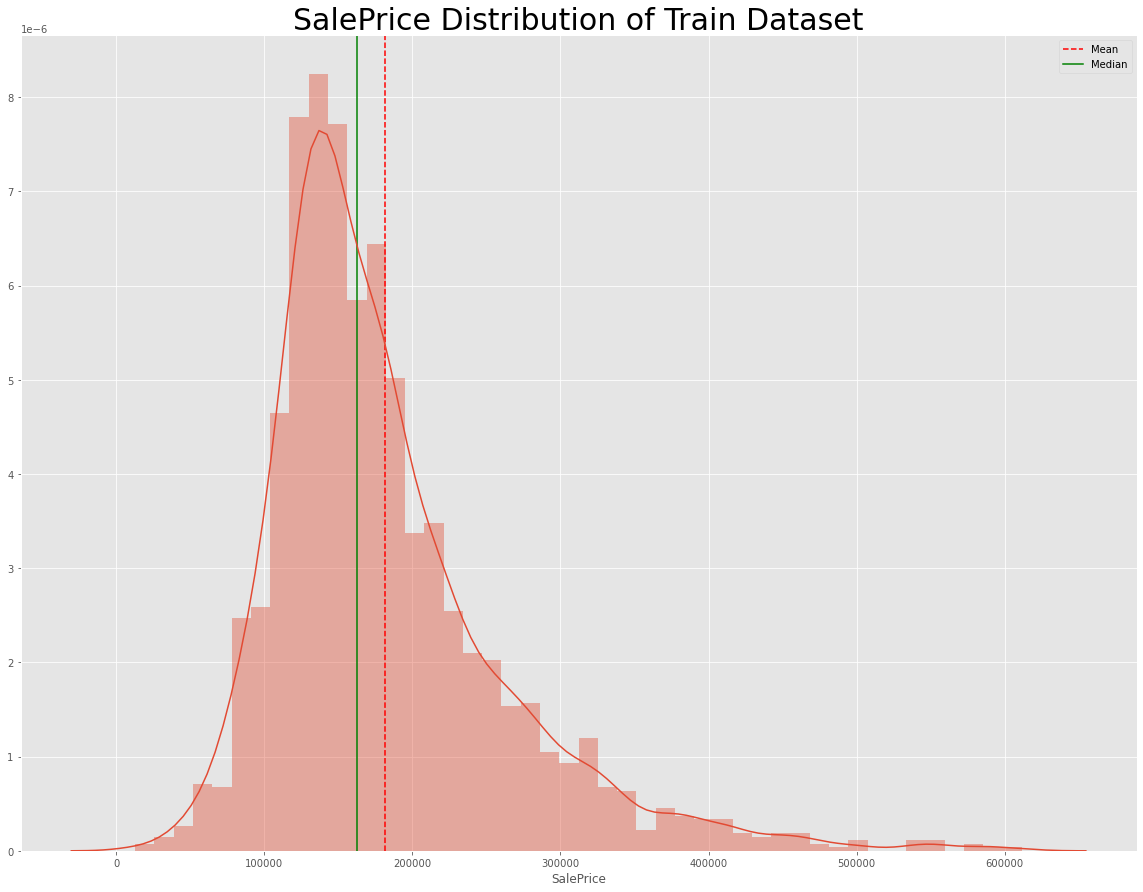

In [143]:
print('Lowest SalePrice: $' + str(df['SalePrice'].min()))
print('Highest SalePrice: $' + str(df['SalePrice'].max()))

plt.figure(figsize= (20, 15))
plt.title('SalePrice Distribution of Train Dataset',fontdict = {'fontsize': 30})
mean=df['SalePrice'].mean()
median=df['SalePrice'].median()
plt.axvline(mean, color='r', linestyle='--')
plt.axvline(median, color='g', linestyle='-')
plt.legend({'Mean':mean,'Median':median})
sns.distplot(df['SalePrice']);

- SalePrice is positively skewed
- the mean and median are more towards the lower prices
- will do comparison of the SalePrice with features to see if there is any correlation

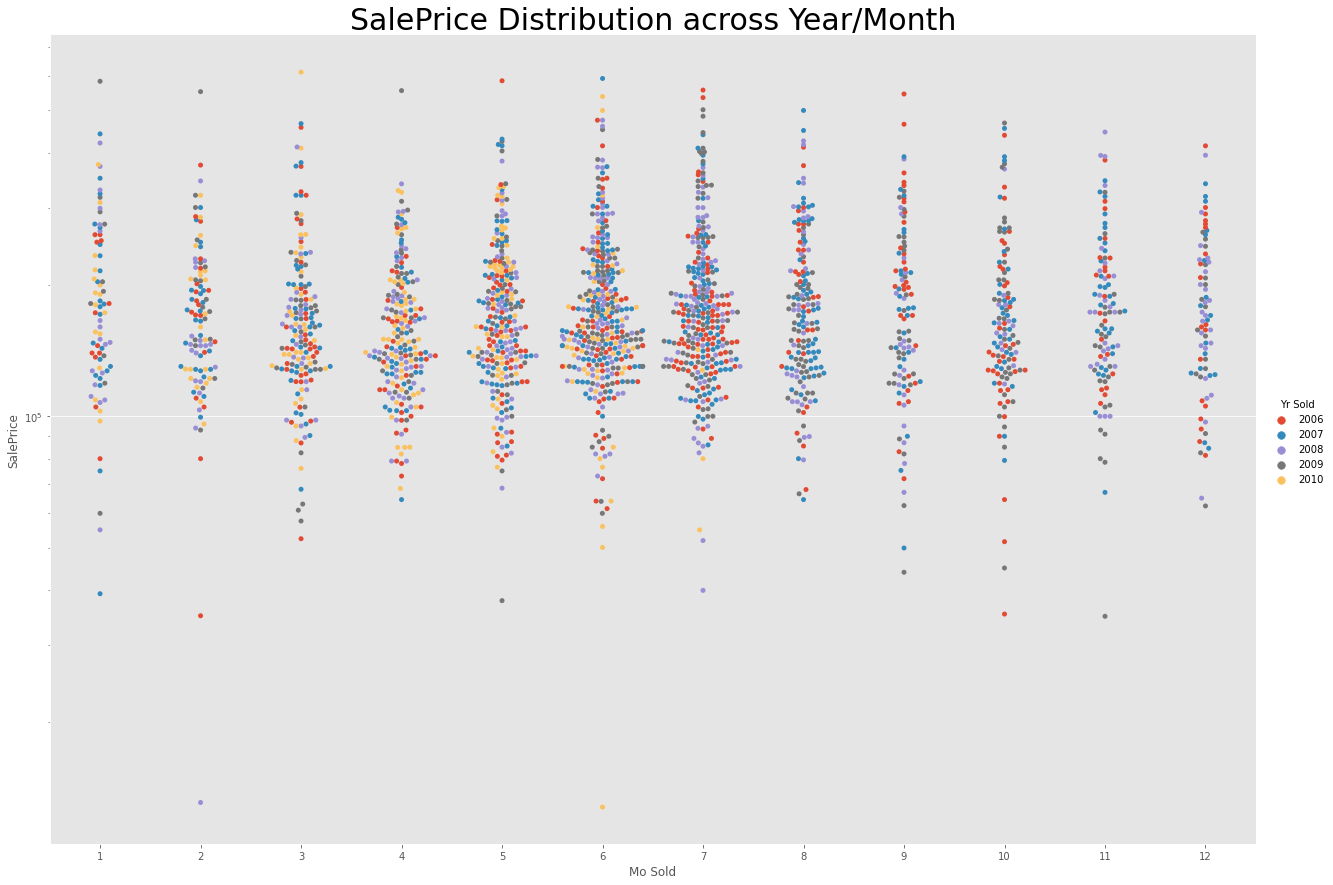

In [144]:
sorted_index = df['Mo Sold'].unique().sort()
fig = sns.catplot(x='Mo Sold', y='SalePrice', hue='Yr Sold', 
                  data=df, kind='swarm',height = 12, aspect=1.5, order = sorted_index)
plt.title('SalePrice Distribution across Year/Month',fontdict = {'fontsize': 30})

ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

### 5.1 comments
- Certain months see more sales across the different years(June and July)
- however, saleprice remain similar across the years period

## 5.2 Checking Distribution of Datasets

In [145]:
def subplot_histplot(xcolumns, xlabels, dataframe = df):
    nrows = int(np.ceil(len(xcolumns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 4*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        sns.distplot(dataframe[column], ax = ax[i], kde_kws={'bw': 0.1, 'label': 'normal'})#plot hist plot for each data
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot

### 5.2.1 Boolean data to SalePrice

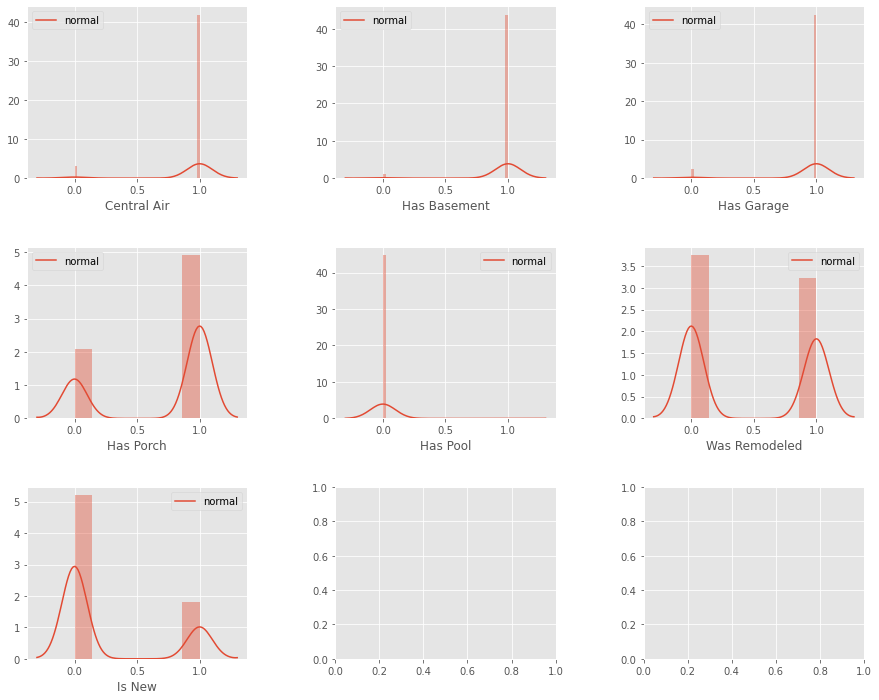

In [146]:
subplot_histplot(boolean_data, boolean_data)

#### 5.2.1 commnets:

- Central Air, Has Basement, Has Garage data are heavily skewed negatively, suggesting most households have the mentioned feature
- Has Pool is heavily skewed positively, suggesting most house has no pool
- rest of the data is slightly more balanced in the distribution. 

### 5.2.2 Continuous data Distribution

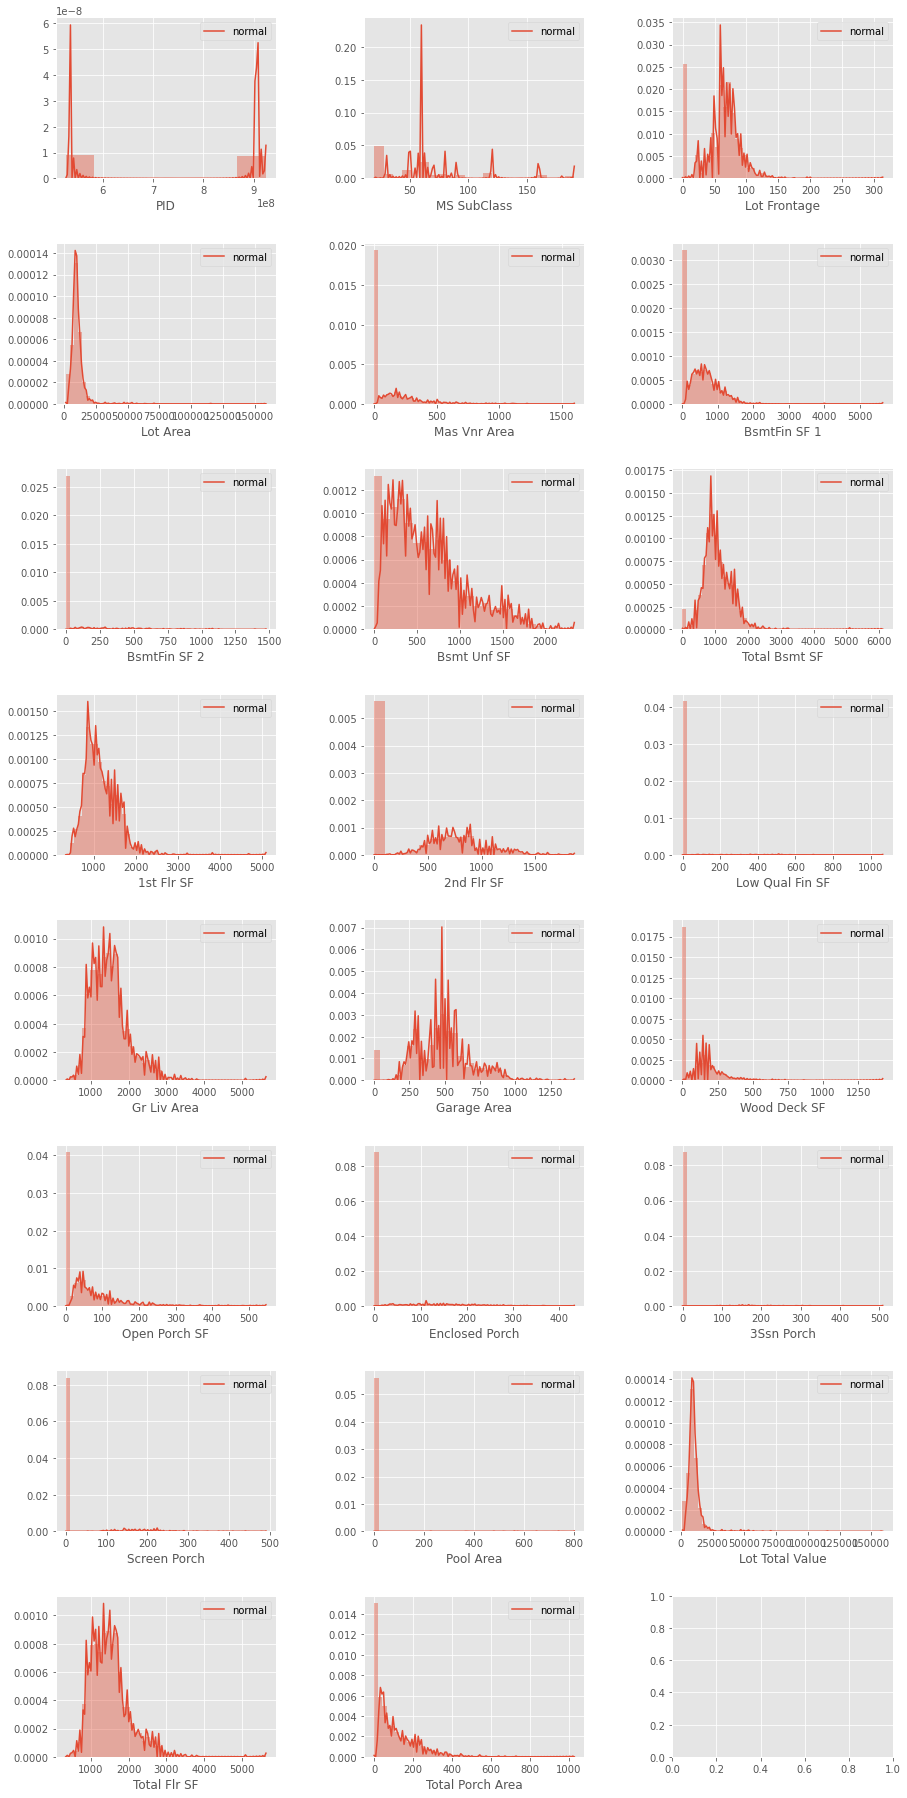

In [147]:
# list all numerical features
num_data = df.select_dtypes(['int64', 'float64']).keys()


num_no_id = [x for x in num_data if ((x != 'SalePrice') & (x != 'Id'))]


num_no_year = [f for f in num_no_id if f not in date_data]

# remove boolean features
num_no_bool = [f for f in num_no_year if f not in boolean_data]

# remove num categorical features
num_features = [f for f in num_no_bool if f not in cat_num_features] 


subplot_histplot(num_features, num_features)

- most data are skewed positively
- will use log to normalize the data

In [148]:
df[num_features] = np.log1p(df[num_features])

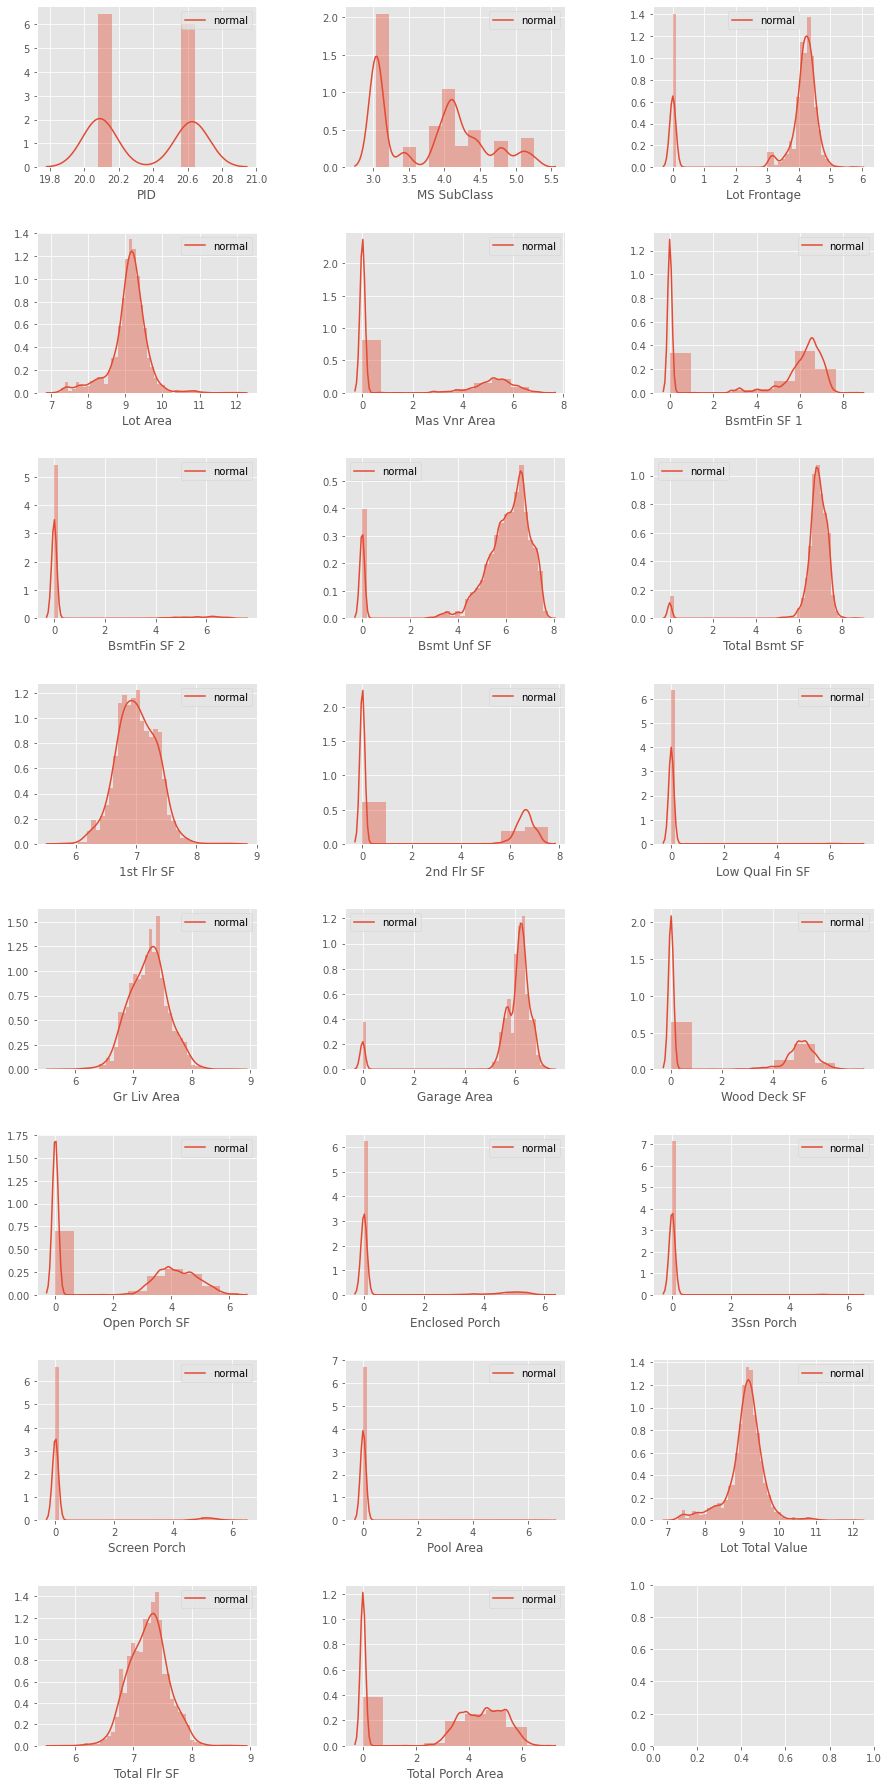

In [149]:
subplot_histplot(num_features, num_features)

- Slight improvement in certain data, but not all, will probably be removed after further EDA

## 5.3 Numerical Data Correlation to SalePrice

In [150]:
#looking for columns with no correlation to sales price
df_corr = df[df.columns[1::]].corr()['SalePrice'][:]

# taking out correlations that is low in correlation to SalePrice (between 0.5 to -0.5)
df_corr[(df_corr <= 0.5) & (df_corr >= -0.5)].sort_values(ascending = False)

Bsmt Total Value       0.493920
Fireplaces             0.471034
Heating QC             0.458620
Kitchen Total Value    0.458082
Open Porch SF          0.455397
Mas Vnr Area           0.454963
Bsmt Exposure          0.424804
Garage Area            0.376117
Lot Total Value        0.366877
Lot Area               0.366707
BsmtFin Type 1         0.350541
Total Bsmt SF          0.335783
Wood Deck SF           0.334249
Has Porch              0.312478
Total Porch Area       0.308030
Paved Drive            0.290548
Garage Qual            0.285614
Bsmt Full Bath         0.283235
Half Bath              0.282909
Central Air            0.277444
Garage Cond            0.265291
Garage Yr Blt          0.258952
Electrical             0.247910
BsmtFin SF 1           0.234043
Has Garage             0.231047
Bsmt Cond              0.225108
Bsmt Unf SF            0.164194
Has Basement           0.157423
Bedroom AbvGr          0.137109
Functional             0.125731
Screen Porch           0.121752
2nd Flr 

- Removing features that has low correlation to Saleprice, as they are most likely not useful for the model

In [151]:
#sort out keys with low correlation with sales price
no_corr = df_corr[(df_corr <= 0.5) & (df_corr >= -0.5)].keys()

no_corr = [f for f in no_corr if f not in date_data]

# remove boolean features
no_corr = [f for f in no_corr if f not in boolean_data]

print(len(no_corr))

47


In [152]:
df.drop(columns=no_corr,inplace = True) #low corr columns removed

df.shape

(2050, 50)

### 5.3.1 Plot data against Sales price
- check for correlation between data
- remove data that has no significant influence to Sales Price

In [153]:
num_df = df.select_dtypes(['int64', 'float64']).keys() # getting the list of numerical data

num_df = [i for i in num_df if i != 'Id']

num_df = [f for f in num_df if f not in boolean_data]

num_df = [f for f in num_df if f not in date_data]

print(len(num_df))

18


In [154]:
#def function to scatter plot data agaisnt sale price
def subplot_scatter(xcolumns, xlabels, dataframe = df):
    nrows = int(np.ceil(len(xcolumns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 4*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        sns.regplot(x = dataframe[column], 
                    y = dataframe['SalePrice'],
                    data = dataframe, 
                    ax = ax[i], line_kws = {'color':'b'})#plot Scatter plot for each data
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot

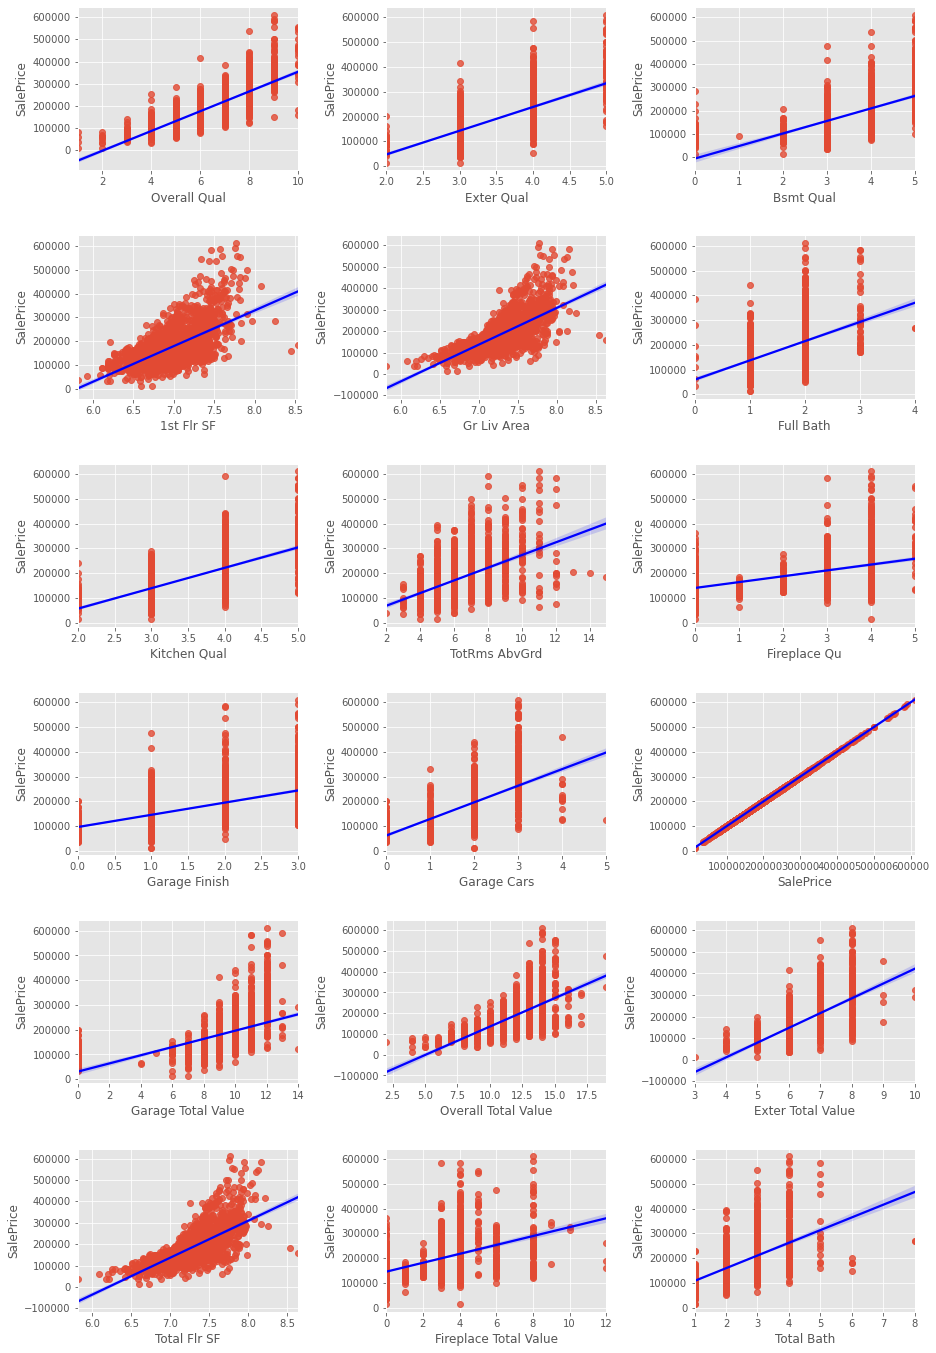

In [155]:
subplot_scatter(xcolumns = num_df, xlabels = num_df) # plotting data with high positive or negative corr with SalePrice

#### 5.3.1 comments on plots:
- Noticeable outliers in a few graphs
- will eliminate the outliers to reduce irregularities

### 5.3.2 Removal of Outliers

In [156]:
z = np.abs(stats.zscore(df[num_df]))

threshold = 4 # deciding a threshold of 4 over 3, despite 3 being the normally used z-score. 
np.where(z> threshold);

- decided a threshold of 4 over 3, despite 3 being the normally used z-score. 
- z-score of 3 will cause the removing of too many rows of data, which will not be helpful
- therefore 4 is chosen instead

In [157]:
df.shape

(2050, 50)

In [158]:
df = df[(z<threshold).all(axis=1)]
df.shape

(2018, 50)

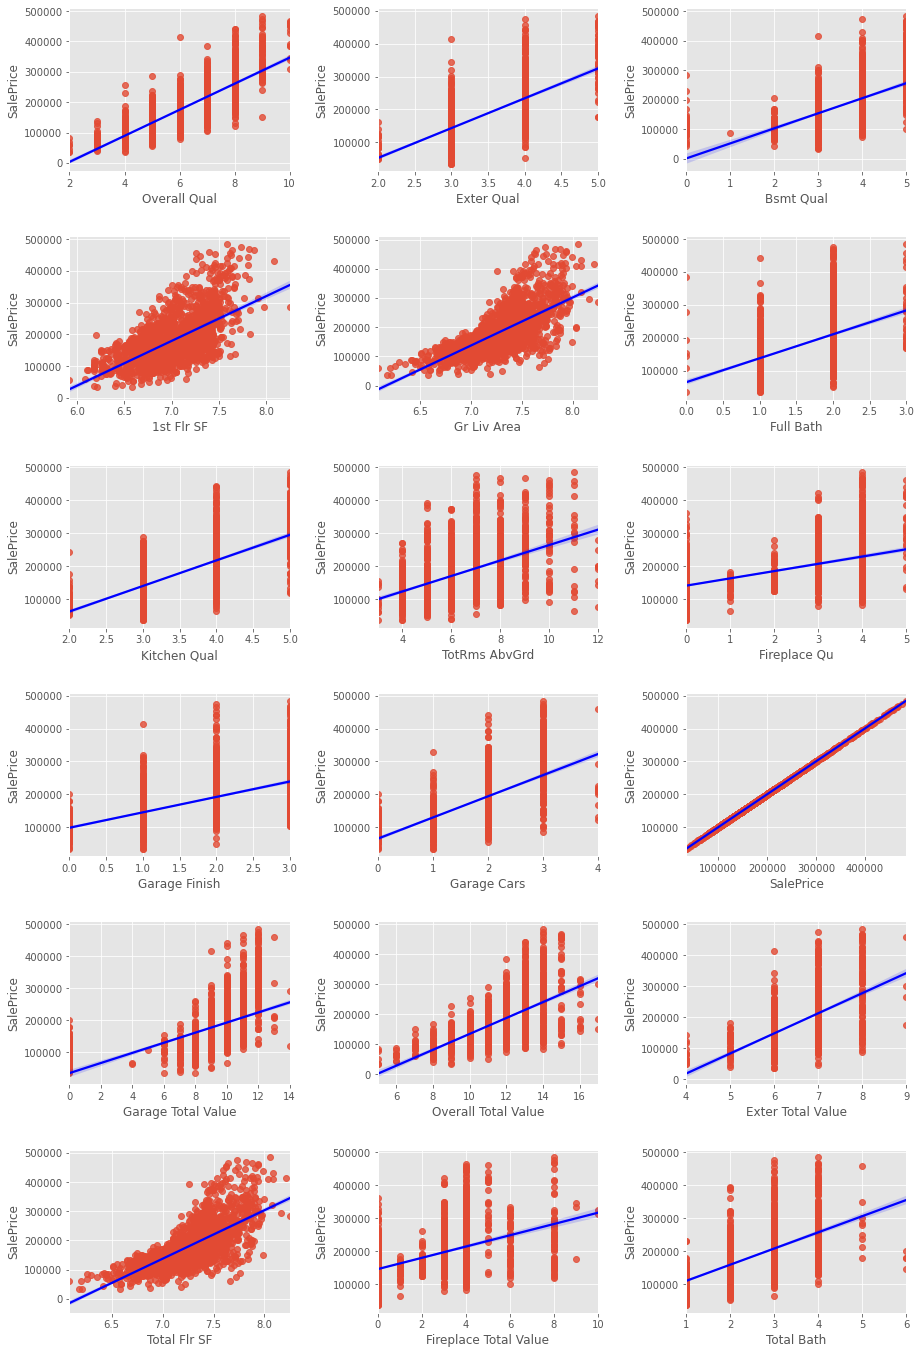

In [159]:
subplot_scatter(xcolumns = num_df, xlabels = num_df, dataframe = df) 
# plotting data with high positive or negative corr with SalePrice

#### 5.3.2 Comments

- outlier removed in continuous data

### 5.3.3 date related data

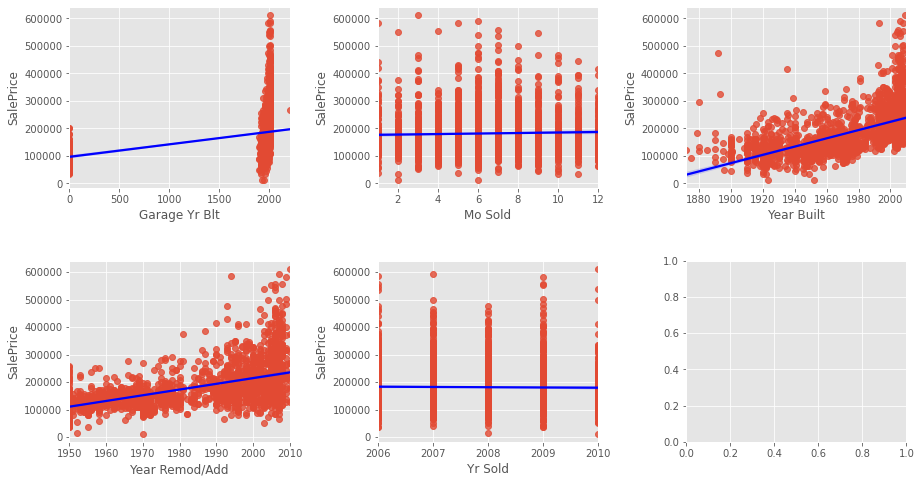

In [160]:
subplot_scatter(xcolumns = date_data, xlabels = date_data)

In [161]:
df[df['Garage Yr Blt']  < 100].shape

(108, 50)

- too many outliers in Garage Yr Blt, will remove feature from train dataset
- There is also no relationship between month and year of sale to saleprice, to be removed

In [162]:
date_to_drop = ['Garage Yr Blt', 'Mo Sold', 'Yr Sold']
df.drop(columns = date_to_drop,inplace = True, errors = 'ignore')  

print(str(len(date_to_drop)) + ' features removed')
df.shape

3 features removed


C:\Users\Sim Yi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2018, 47)

Outlier fixed!

#### 5.3.3 comments 

- data looks correlated to sale price and will be used for model

## 5.4 Categorical Data correlation to SalePrice

In [163]:
obj_data = df.select_dtypes(['object']).keys()
print(len(obj_data))
obj_data

19


Index(['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Heating', 'Garage Type', 'Misc Feature', 'Sale Type'], dtype='object')

In [164]:
df_train_clean_obj = df.loc[:, obj_data]
df_train_clean_obj['SalePrice'] = df['SalePrice'] #adding in saleprice column for obj dataframe
print(df_train_clean_obj.shape)
df_train_clean_obj.head()

(2018, 20)


,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Heating,Garage Type,Misc Feature,Sale Type,SalePrice
0,RL,Pave,NA,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,GasA,Attchd,NA,WD,130500
1,RL,Pave,NA,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,GasA,Attchd,NA,WD,220000
2,RL,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,GasA,Detchd,NA,WD,109000
3,RL,Pave,NA,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,GasA,BuiltIn,NA,WD,174000
4,RL,Pave,NA,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,GasA,Detchd,NA,WD,138500


In [165]:
def subplot_boxplot(xcolumns, xlabels, dataframe = df):
    nrows = int(np.ceil(len(xcolumns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14, 5*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(xcolumns):  # Gives us an index value to get into all our lists
        sorted_index = dataframe.groupby(column)['SalePrice'].median().sort_values().index
        sns.boxenplot(x = column, y = 'SalePrice', 
                    ax = ax[i], data = dataframe, order = sorted_index) #plot Scatter plot for each data
        ax[i].set_xlabel(xlabels[i])# Set x label for each plot
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45);

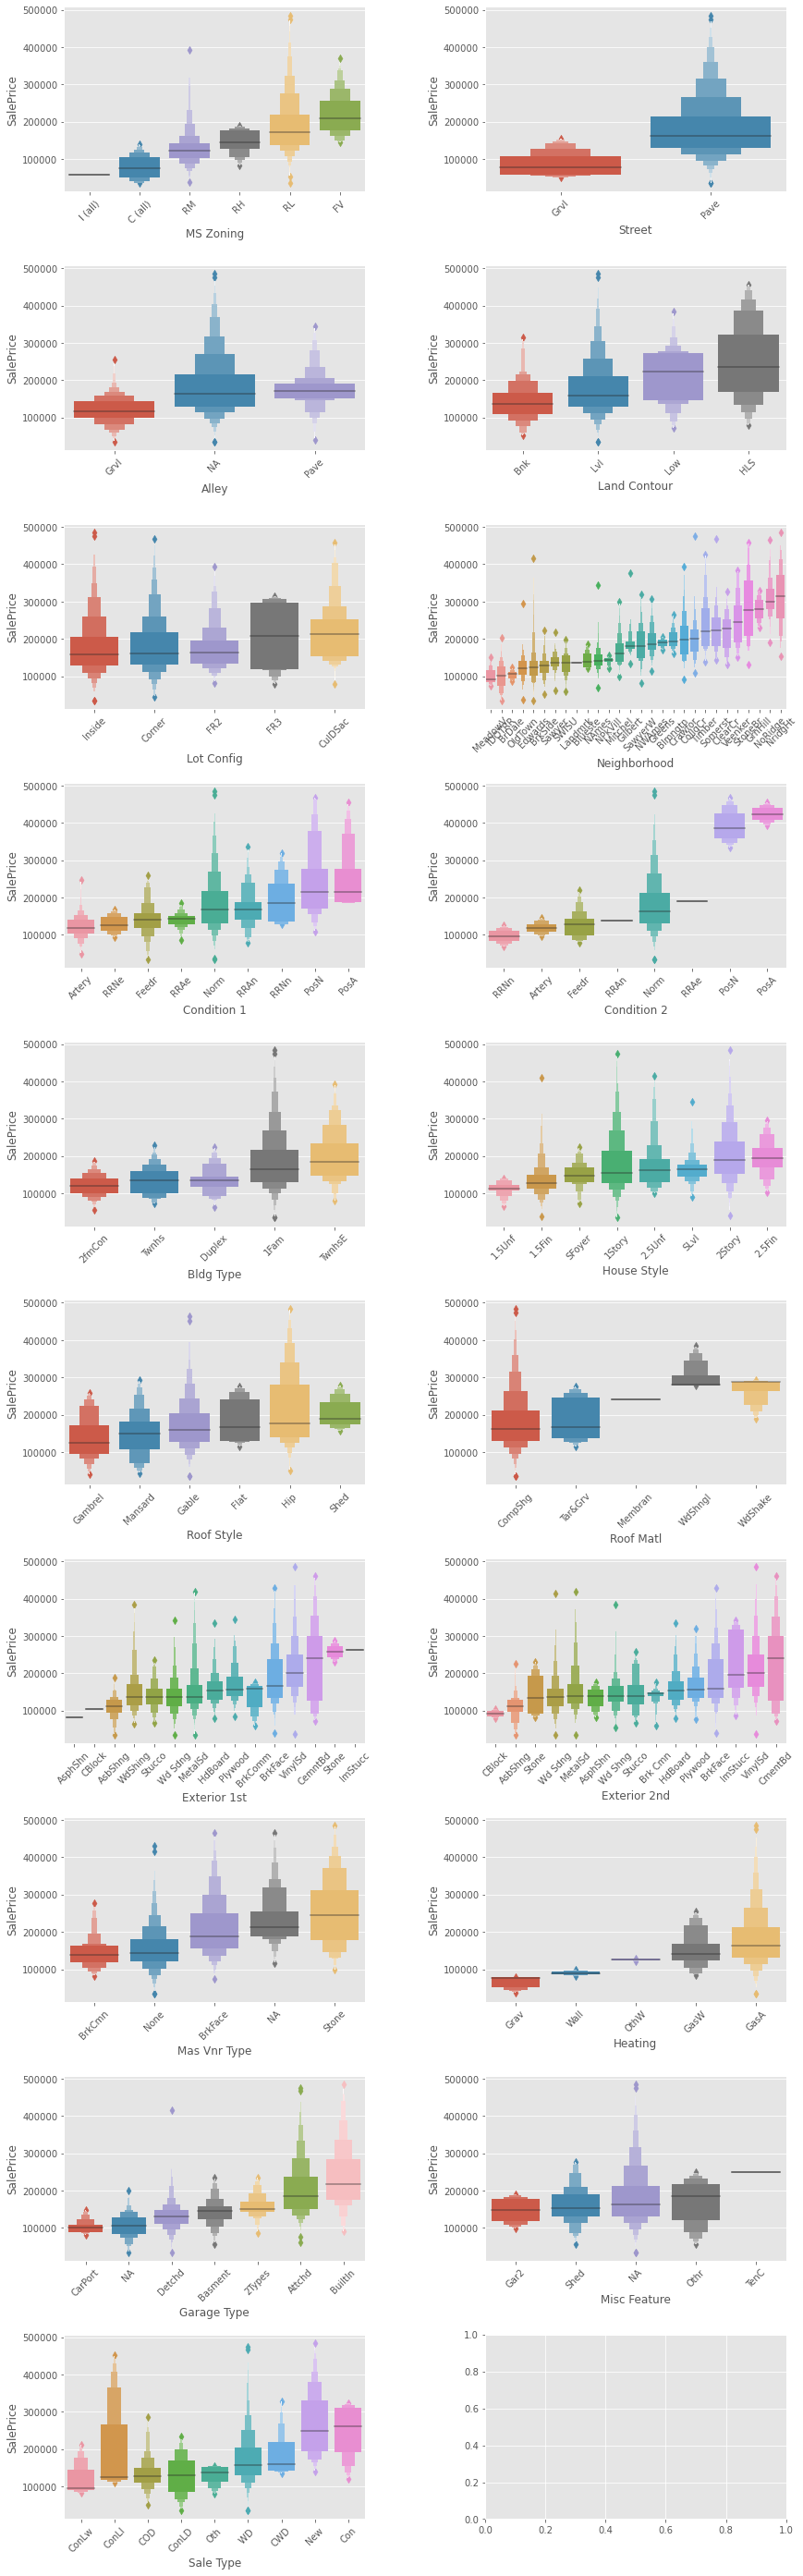

In [166]:
subplot_boxplot(xcolumns = obj_data, xlabels = obj_data)

### 5.4 comments:
Observations done on boxen plots to see the correlation of the features to saleprice.

To be removed:
- Alley, too many NA for Alley category
- Lot Config, there is no correlation between the feature and saleprice
- Roof Matl, there is no correlation between the feature and saleprice
- Sale Type, No correlation with the sale price
- Misc Feature, no correlation with sale price across category

In [167]:
box_to_drop = ['Alley', 'Lot Config', 'Roof Matl', 
               'Sale Type', 'Misc Feature'] # 5 columns removed
df.drop(columns = box_to_drop,inplace = True, errors = 'ignore') #5 columns removed  

print(str(len(box_to_drop)) + ' features removed')
df.shape

5 features removed


C:\Users\Sim Yi\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2018, 42)

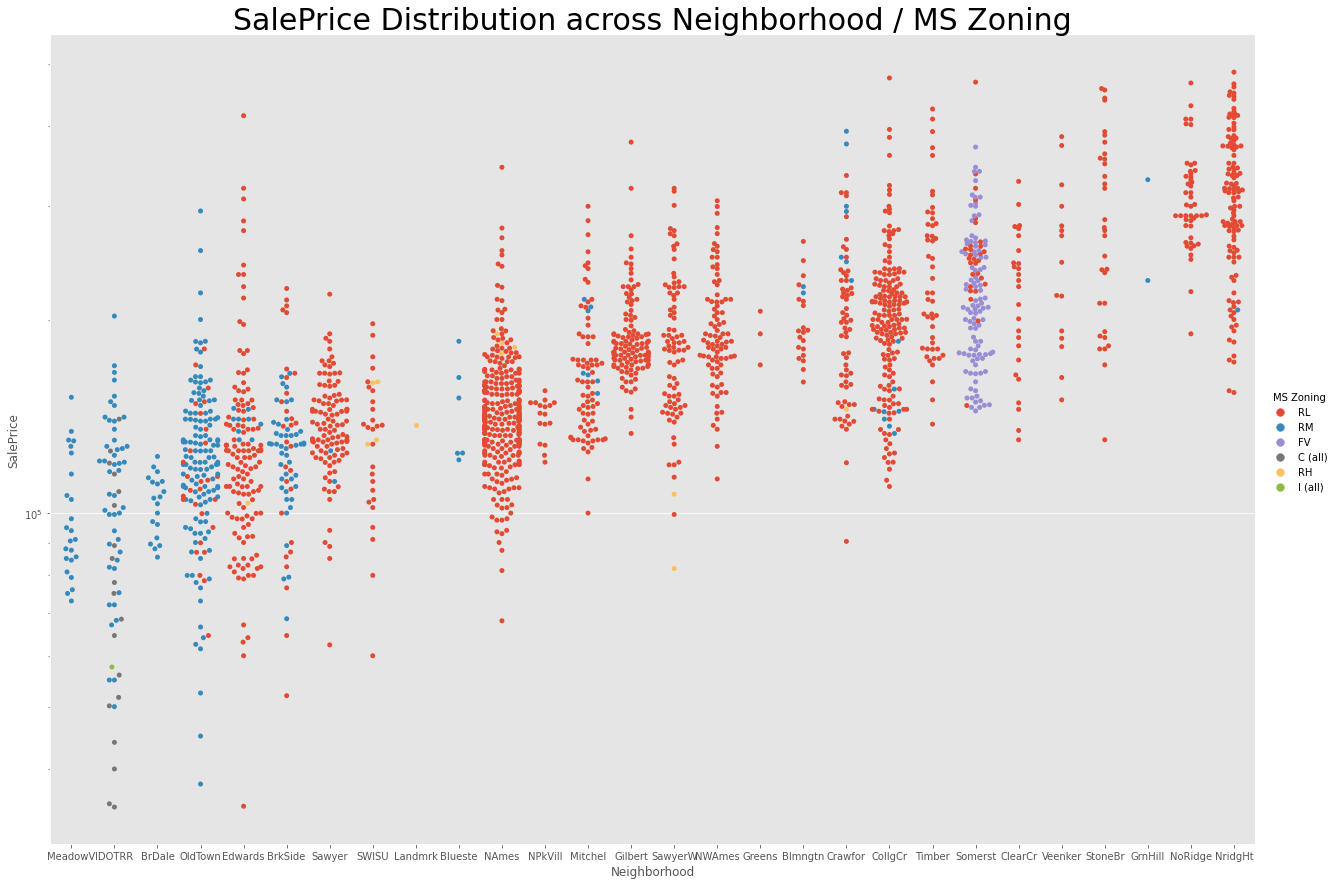

In [168]:
sorted_index = df.groupby('Neighborhood')['SalePrice'].median().sort_values().index
fig = sns.catplot(x='Neighborhood', y='SalePrice', hue='MS Zoning', 
                  data=df, kind='swarm',height = 12, aspect=1.5, order = sorted_index)
plt.title('SalePrice Distribution across Neighborhood / MS Zoning',fontdict = {'fontsize': 30})
ax = fig.axes[0][0]
ax.set_yscale('log')
plt.show()

- Areas that is Residential Low Density area tend to have higher saleprice

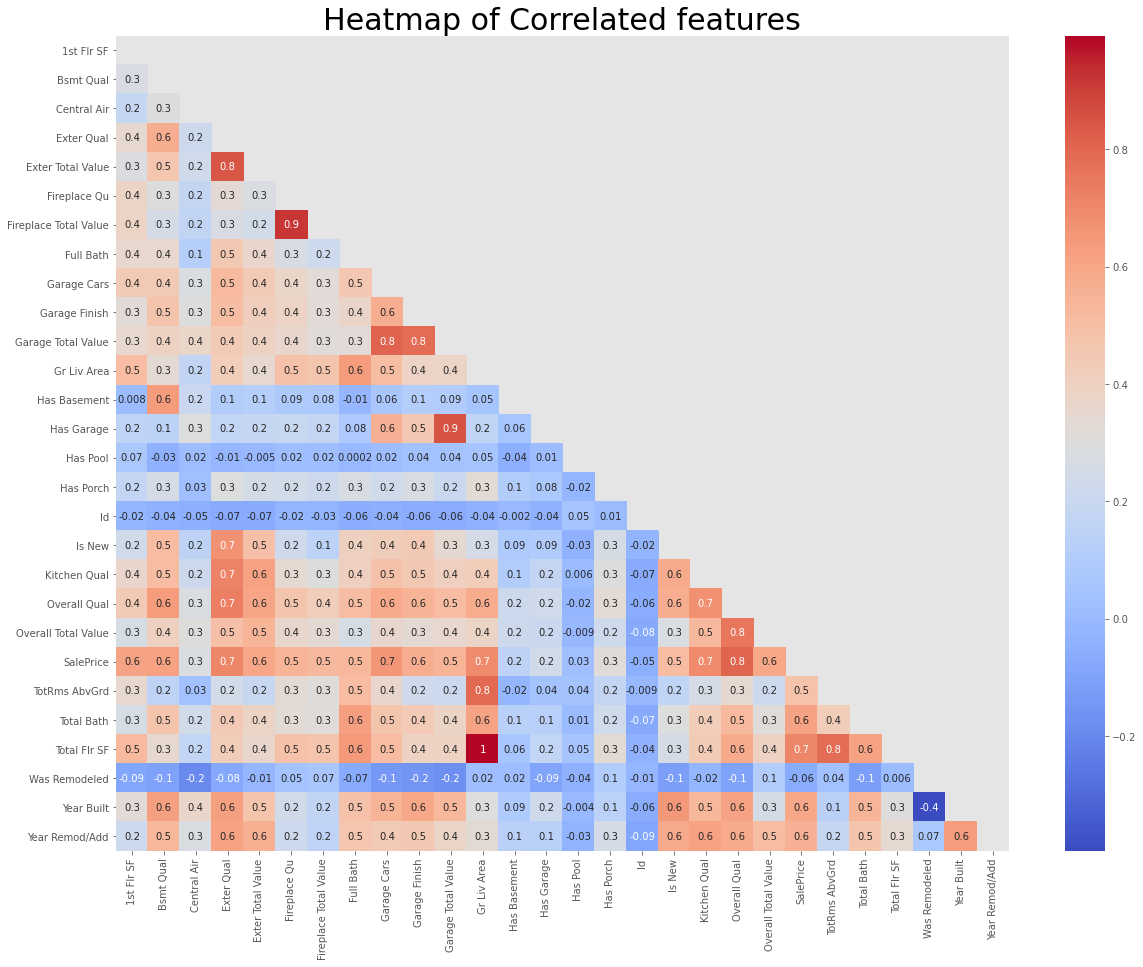

In [169]:
coef_sort = [i for i in df.columns.sort_values()]
plt.figure(figsize= (20, 15))
plt.title('Heatmap of Correlated features',fontdict = {'fontsize': 30})
mask = (np.triu(np.ones_like(df[coef_sort].corr(),
                             dtype=np.bool)))
sns.heatmap(df[coef_sort].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm');

Features to remove to prevent Multicollinearity
- 'Exter Total Value' & 'Exter Qual' are highly correlated to each other, will remove 'Exter Qual'
- 'Total Flr SF' & 'Gr Liv Area' are completely correlated to each other, will remove 'Gr Liv Area'
- 'Fireplace Total Value' & 'Fireplace Qu' are highly correlated to each other, will remove 'Fireplace Qu'
- 'Overall Total Value' & 'Overall Qual' are highly correlated to each other, will remove 'Overall Qual'

In [170]:
box_to_drop = ['Gr Liv Area', 'Exter Qual', 'Fireplace Qu', 'Overall Qual'] # 5 columns removed
df.drop(columns = box_to_drop,inplace = True, errors = 'ignore') #5 columns removed  

print(str(len(box_to_drop)) + ' features removed')
df.shape

4 features removed


(2018, 38)

In [171]:
[i for i in df.columns.sort_values()]

['1st Flr SF',
 'Bldg Type',
 'Bsmt Qual',
 'Central Air',
 'Condition 1',
 'Condition 2',
 'Exter Total Value',
 'Exterior 1st',
 'Exterior 2nd',
 'Fireplace Total Value',
 'Full Bath',
 'Garage Cars',
 'Garage Finish',
 'Garage Total Value',
 'Garage Type',
 'Has Basement',
 'Has Garage',
 'Has Pool',
 'Has Porch',
 'Heating',
 'House Style',
 'Id',
 'Is New',
 'Kitchen Qual',
 'Land Contour',
 'MS Zoning',
 'Mas Vnr Type',
 'Neighborhood',
 'Overall Total Value',
 'Roof Style',
 'SalePrice',
 'Street',
 'TotRms AbvGrd',
 'Total Bath',
 'Total Flr SF',
 'Was Remodeled',
 'Year Built',
 'Year Remod/Add']

In [172]:
print(str(len(df.columns)) + ' features left after EDA')
#export dataset for further evaluation

df.to_csv("../datasets/train_EDA.csv", index=False)

38 features left after EDA


## to be continued to Preprocessing and Feature Engineering